# **Deep Learning < Image Classification />**

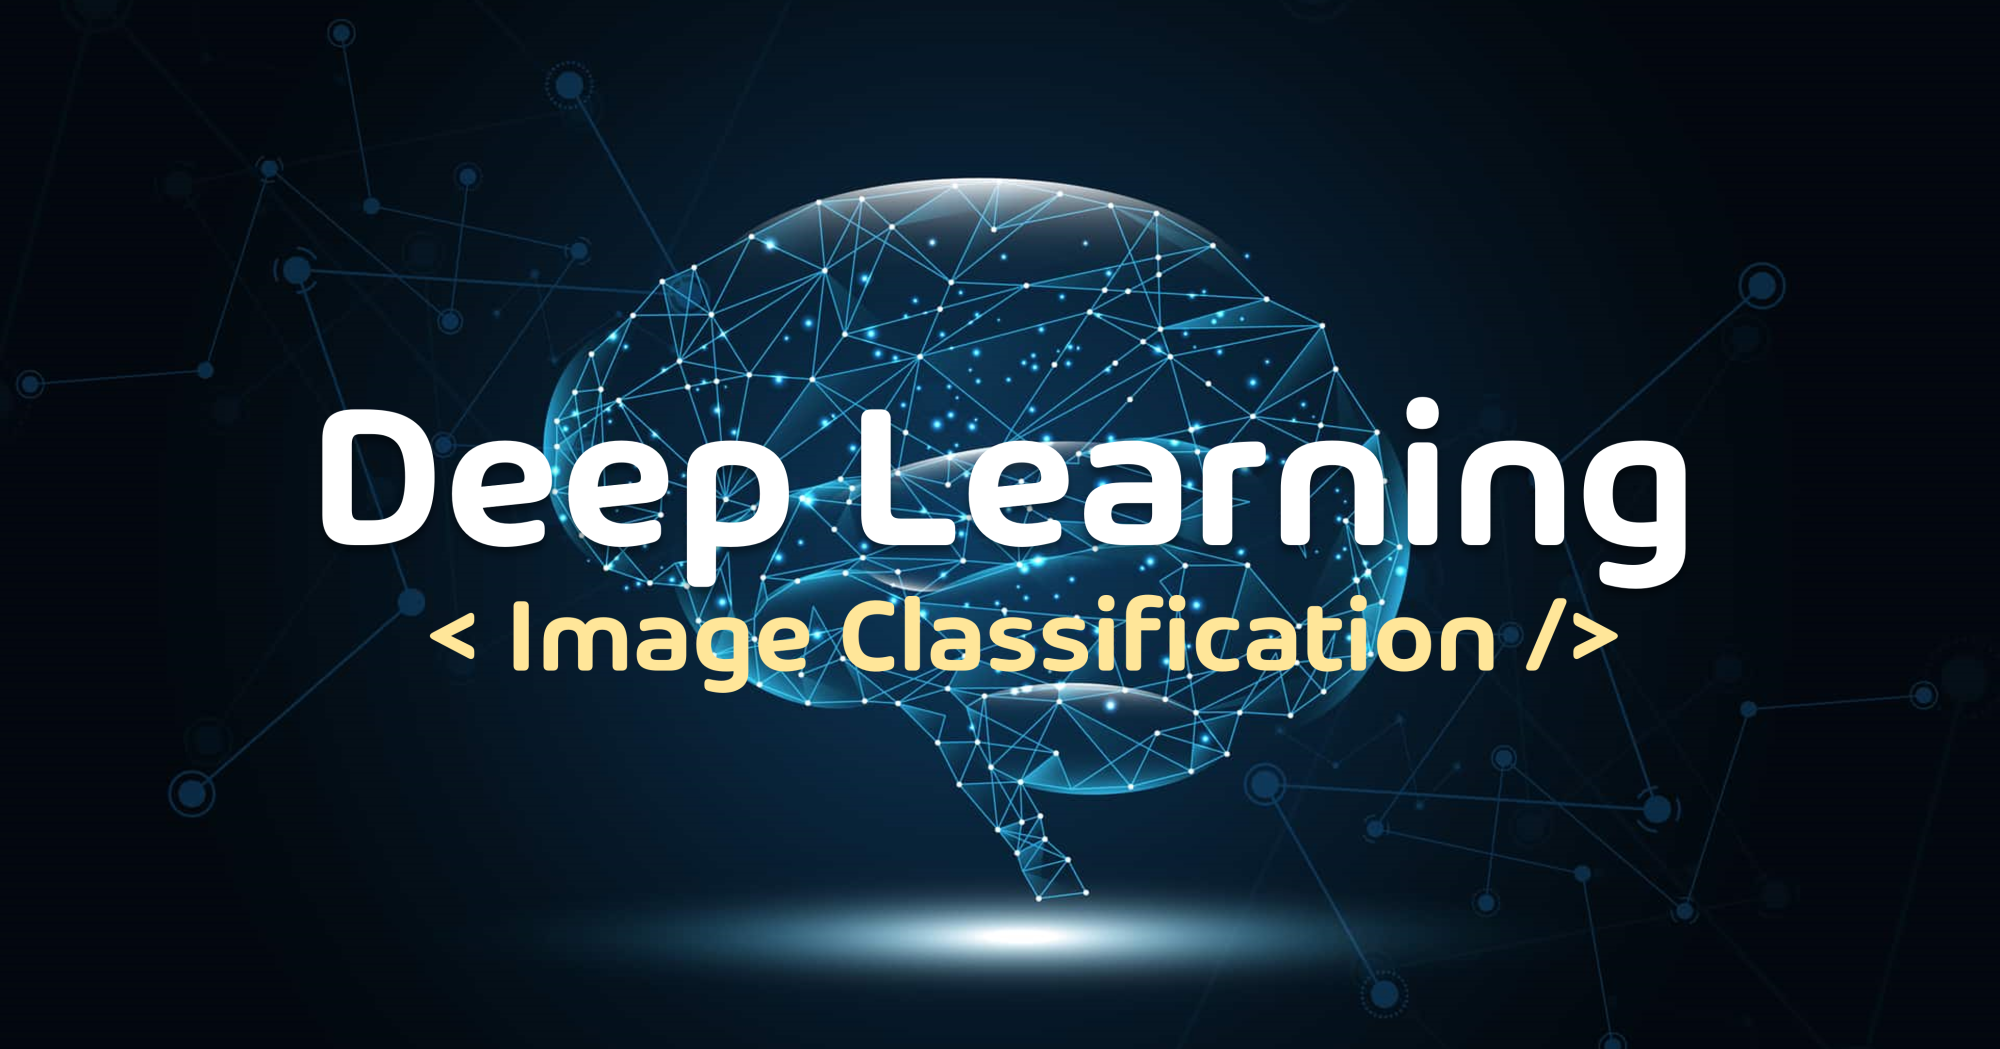

In this project, you'll gain experience using training a deep neural network for image classification using TensorFlow and Keras. To build the model, you will use [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), a publicly available dataset of images. The dataset consists of 60,000 images that are quite small, 32 pixels high by 32 pixels wide. Each image is labeled with one of 10 classes.  

Here are the 10 random images from each class:

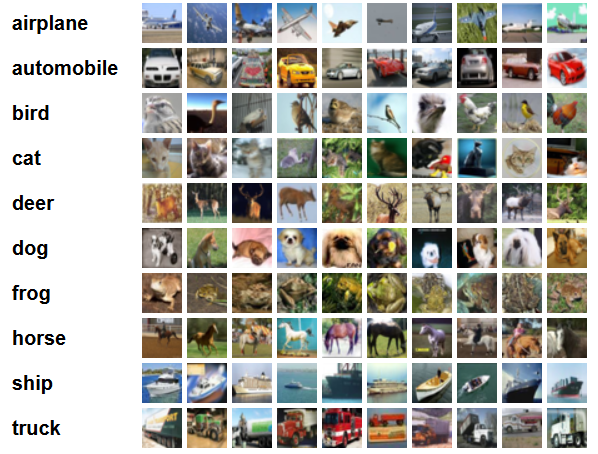

Due to the amount and size of the data, training deep neural networks for image recognition can be computationally expensive.  Because of this, you will want to train these types of models using GPUs or TPUs if available, rather than CPUs. To give you an idea of the differences in training time, performing one forward and backward pass of model training in this project using Google Colab takes approximately:


> 5 minutes using a CPU 

but only...

> 10 seconds using a GPU

<br>

Therefore, if it takes 100 iterations to fully train the model, you are looking at approximately:

> **8 hours total training time (CPU)**

versus...

> **16 minutes total training time (GPU)**

Before diving into the code, you'll learn how to set up your environment to train using a GPU hardware accelerator.

## 1) Set Up Hardware Acceleration

Depending on your set up, here's how you can set this project up to train with GPUs. Note, you only to go through the steps that are relevant for your chosen environment setup.

### 1.1) Colab Environment
* In the menu, navigate to **Edit** → **Notebook settings** 

* Select **GPU** from the **Hardware accelerator** drop-down and press **Save**. <br><br>

     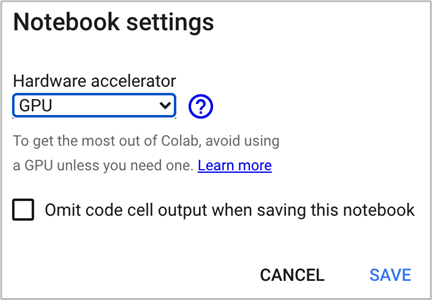

<br>

### 1.2) Binder Environment   
* Unfortunately if you are using Binder you are stuck with training on CPUs only. 
* However, with no GPU support, Binder causes Tensorflow to output warning messages. 
* Although harmless, these messages can be annoying and so you can run the following code to suppress them.

In [ ]:
# Suppress tensorflow warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

<br>

### 1.3) Local Environment
* Follow this [TensorFlow Guide to Use a GPU](https://www.tensorflow.org/guide/gpu). 
* If you don't have a GPU available, run the code above from the Binder section to suppress associated TensorFlow warning messages.

## 2) Import Project Libraries

You'll be using TensorFlow and Keras as a frontend to TensorFlow.  Both are great frameworks and can be used independently.  However, Keras allows you to specify and build models without having to use the more verbose methods in TensorFlow. 

In [ ]:
# Import project libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## 3) Load the Dataset
Next up, loading the CIFAR dataset. Keras allows you to do this quite easily and the dataset itself is already split for you into images for training and images for testing.


In [ ]:
# Load dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## 4) Explore and Visualize the Dataset

 Now it's time to explore the dataset by taking iterative peeks at it and discovering its shape.

### 4.1 Peek at the Data

Recall that with textual data, you could call the ```head()``` function to view the first few records.  However, when dealing with images you may want to have a convenient way to display them and their corresponding labels from within the python environment.  

You can achieve this by defining:
* Defining a custom function ```plot_images``` that allows you to take a peek at some of the labeled images.
* Declaring an array ```class_names``` that the function will refer to so that it can map classification results to human-readable labels.

In [ ]:
# Array for mapping classification results to labels
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# Custom function for displaying dataset images at random in a grid format
def plot_images(x, y, number_of_images=5):
  fig, axes1 = plt.subplots(number_of_images,number_of_images,figsize=(10,10))
  for j in range(number_of_images):
      for k in range(number_of_images):
          i = np.random.choice(range(len(x)))
          title = class_names[y[i:i+1][0][0]]
          axes1[j][k].title.set_text(title)
          axes1[j][k].set_axis_off()
          axes1[j][k].imshow(x[i:i+1][0])

**Give it a try!** 

Explore the images by executing the function call in the code block below:
*   Multiple times &mdash; each execution should display a different set of images.
*   Using different parameters, e.g., ```number_of_images=5``` or with ```x_test``` and ```y_test``` 



In [ ]:
# Visualize the data by plotting images
plot_images(x_train, y_train, number_of_images=3)

Though the images are not very clear there are enough pixels for you to make out which object is in those images.

### 4.2 Discover the Shape of the Data


In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

print('y_train shape', y_train.shape)
print(x_test.shape[0], 'test samples')

print('x_test shape', x_test.shape)
print(y_test.shape[0], 'test samples')

After execution, you should see that there are...
* 50,000 training samples
* 10,000 test samples
<br><br>

Each input image in the training set has...
* 32 pixels in height
* 32 pixels in width
* 3 color channels




## 5) Set Up, Train, and Validate Model
Setting up the model here involves creating a deep neural network using a few convolutions, dropout, and max pooling.  If none of those terms makes sense to you, don't worry and always remember that you don't need to understand everything on the first pass.



### 5.1 Define the Model


In [ ]:
# Set Up a Deep Convolutional Neural Network
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

That's it!

Here are the meanings of some of the parameters used in the model definition code above:
*  ```Conv2D``` a layer to convolve the image into multiple images.
*  ```activation``` the function that defines the output of a neuron given a set of inputs.
* ```MaxPooling2D``` downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window of size ```pool_size```.
* ```Flatten``` converts the multi-dimensional inputs into a single dimension.
* ```Dense``` used to make a layer deeply connected in that it receives input from all neurons of its previous layer.
* ```Dropout``` a layer to mask the effect of some neurons to the next layer in an effort to prevent overfitting on the training data. 

You can examine your model with ```summary()``` function and see the process of the image through the convolutions.

In [ ]:
model.summary();

### 5.1 Compile the Model

It's soon time to train the model.  However, before you can kick off the training, you have to compile the model and get its **loss**.
*   Loss is a measure of how well the model did during training and validation.
*   A high loss means that the model did poorly, while a low loss means that the model did well.

Keras provides a variety of **loss functions**, **optimizers** that adjust the model weights to improve how the model is performing. 




In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

Here the model was compiled to use:
*  Categorical Crossentropy as the loss function
*  the Adam Optimizer for adjusting weights and improving the model
*  Accuracy as the performance measure

### 5.2 Train and Validate the Model

When training a neural network, you generally have to define the ```batch_size``` and the number of ```epochs```.

*   The batch size is the number of training examples in one forward or backward pass through the network.
*   An epoch is one forward pass and one backward passs of all of the training examples.

In [ ]:
# Define batch size and number of epochs
batch_size = 32 
epochs = 5

Now, kick off the training!

In [ ]:
# Train the model
r = model.fit(x_train / 255.0, tf.keras.utils.to_categorical(y_train),
              batch_size=batch_size,
              shuffle=True,
              epochs=epochs,
              validation_data=(x_test / 255.0, tf.keras.utils.to_categorical(y_test))
             )

Now that you have trained the model you can visualize the accuracy per iteration for better analysis.  

In [ ]:
# Plot the accuracy during training and validation per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

## 6) Evaluate Model Predictions

In [ ]:
# Evaluate the model
scores = model.evaluate(x_test / 255.0, tf.keras.utils.to_categorical(y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

## 7) Perform a Realistic Run: Assignment

Browse through the program below to reinforce many of the concepts you have learned so far. You will notice that in this version of the program the code for exploring and visualizing the dataset has been removed.  This is intentional so that the output only focuses on the model definition and training results.

<br>

### Instructions
* Modify the code below so that the number of training iterations is set to 100.
* Kick off the run... now might be a good time to take a break :)
* After the training completes, head back to the course portal and send a text reply or upload a screenshot of your results. 



In [ ]:
# Import Project Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Set up the deep learning model using a CNN architecture
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Define batch size and number of epochs
batch_size = 32 
epochs = 5

# Train the model
r = model.fit(x_train / 255.0, tf.keras.utils.to_categorical(y_train),
              batch_size=batch_size,
              shuffle=True,
              epochs=epochs,
              validation_data=(x_test / 255.0, tf.keras.utils.to_categorical(y_test))
             )

# Plot the accuracy during training and validation per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

# Evaluate the model
scores = model.evaluate(x_test / 255.0, tf.keras.utils.to_categorical(y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])